In [1]:
#This is a basic housing dataset. With it I will showcase Data Cleaning and Feature Engineering, Descriptive Statistics and Machine Learning.

In [2]:
#Firstly, we will import pandas and numpy libraries

In [3]:
import numpy as np
import pandas as pd

In [4]:
#Now we will import our dataset

In [5]:
inpPath = 'C:/Users/jammy/OneDrive/Desktop/'
housingdata = pd.read_csv(inpPath + 'housing.csv', delimiter=',')

In [6]:
#Now we will have a look at the data

In [7]:
housingdata

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
#We can see that the formatting of the dates is a bit messy, so we will try and change this

In [9]:
from datetime import datetime

In [10]:
housingdata['date'] = pd.to_datetime(housingdata['date'], errors='coerce')
housingdata['date'] = housingdata['date'].dt.strftime('%Y-%m-%d')
print(housingdata)

               id        date     price  bedrooms  bathrooms  sqft_living  \
0      7229300521  2014-10-13  231300.0         2       1.00         1180   
1      6414100192  2014-12-09  538000.0         3       2.25         2570   
2      5631500400  2015-02-25  180000.0         2       1.00          770   
3      2487200875  2014-12-09  604000.0         4       3.00         1960   
4      1954400510  2015-02-18  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21608   263000018  2014-05-21  360000.0         3       2.50         1530   
21609  6600060120  2015-02-23  400000.0         4       2.50         2310   
21610  1523300141  2014-06-23  402101.0         2       0.75         1020   
21611   291310100  2015-01-16  400000.0         3       2.50         1600   
21612  1523300157  2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0     

In [11]:
#For the purpose of the dataset, lets remove the waterfront column as while 163 houses have waterfronts, I don't feel it is important in buying a house.

In [12]:
housingdata = housingdata.drop(columns='waterfront')

In [13]:
print(housingdata.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [14]:
#Now we will clean the data, addressing any null values, duplicates and outliers that may exist

In [15]:
#First lets check for and remove any null values, if there is any - we there aren't

In [16]:
print(housingdata.isnull().sum()) 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [17]:
#Next we will look for any duplicates in the id section and remove them

In [18]:
housingdata = housingdata.drop_duplicates(subset=['id'], keep='first')
print(housingdata)

               id        date     price  bedrooms  bathrooms  sqft_living  \
0      7229300521  2014-10-13  231300.0         2       1.00         1180   
1      6414100192  2014-12-09  538000.0         3       2.25         2570   
2      5631500400  2015-02-25  180000.0         2       1.00          770   
3      2487200875  2014-12-09  604000.0         4       3.00         1960   
4      1954400510  2015-02-18  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21608   263000018  2014-05-21  360000.0         3       2.50         1530   
21609  6600060120  2015-02-23  400000.0         4       2.50         2310   
21610  1523300141  2014-06-23  402101.0         2       0.75         1020   
21611   291310100  2015-01-16  400000.0         3       2.50         1600   
21612  1523300157  2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  view  condition  grade  sqft_above  sqft_basement 

In [19]:
#Finally we will use IQR on the price column to remove any outliers - firstly establishing Q1 and Q3 values then subtracting to establish the IQR

In [20]:
Q1 = housingdata['price'].quantile(0.25)
Q3 = housingdata['price'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

322850.0


In [21]:
#Next we establish to upper and lower bounds

In [22]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-162125.0
1129275.0


In [23]:
#Now I filter out whatever is outside the lower and upper bounds, these are the outliers.

In [24]:
housingdata_filtered = housingdata[(housingdata['price'] >= lower_bound) & (housingdata['price'] <= upper_bound)]

In [25]:
#How many entries were removed as outliers?

In [26]:
print(len(housingdata) - len(housingdata_filtered))

1139


In [27]:
#We now have our cleaned dataset

In [28]:
print(housingdata_filtered)

               id        date     price  bedrooms  bathrooms  sqft_living  \
0      7229300521  2014-10-13  231300.0         2       1.00         1180   
1      6414100192  2014-12-09  538000.0         3       2.25         2570   
2      5631500400  2015-02-25  180000.0         2       1.00          770   
3      2487200875  2014-12-09  604000.0         4       3.00         1960   
4      1954400510  2015-02-18  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21608   263000018  2014-05-21  360000.0         3       2.50         1530   
21609  6600060120  2015-02-23  400000.0         4       2.50         2310   
21610  1523300141  2014-06-23  402101.0         2       0.75         1020   
21611   291310100  2015-01-16  400000.0         3       2.50         1600   
21612  1523300157  2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  view  condition  grade  sqft_above  sqft_basement 

In [29]:
#Firstly, lets have a look at some descriptive statistics

In [30]:
#Let's have a look at the different data types

In [31]:
data_type = housingdata_filtered.dtypes
print(data_type)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [32]:
#Let's get an idea of the shape of the data

In [33]:
housingdata_filtered.shape

(20297, 20)

In [34]:
#Let's have a look at the describing some of the numeric columns

In [35]:
#Overview of Numeric values
housingdata_filtered.describe(include=np.number)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.029700e+04,2.029700e+04,20297.000000,20297.000000,20297.000000,2.029700e+04,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000,20297.000000
mean,4.604442e+09,4.772626e+05,3.330197,2.054084,1978.235158,1.464634e+04,1.477854,0.173622,3.407499,7.535498,1710.736562,267.498596,1970.910874,74.916539,98078.456373,47.556983,-122.213026,1924.116126,12466.256590
std,2.877334e+09,2.084979e+05,0.911890,0.711399,775.491728,4.024721e+04,0.537484,0.642417,0.646790,1.038258,728.055167,409.367450,29.168739,379.343170,53.304558,0.141081,0.142481,615.531752,26609.851181
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.133010e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1952.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5040.000000
50%,3.905082e+09,4.378500e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1975.000000,0.000000,98065.000000,47.567100,-122.231000,1800.000000,7539.000000
75%,7.338001e+09,6.010000e+05,4.000000,2.500000,2440.000000,1.032100e+04,2.000000,0.000000,4.000000,8.000000,2110.000000,510.000000,1996.000000,0.000000,98118.000000,47.679800,-122.122000,2280.000000,9891.000000
max,9.900000e+09,1.127500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,4.000000,5.000000,12.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


In [36]:
#I notice I am getting scientific notations "e+" here so I need to address this to get a better picture of the descriptive statistics

In [37]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [38]:
housingdata_filtered.describe(include=np.number)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00,20297.00
mean,4604442467.47,477262.56,3.33,2.05,1978.24,14646.34,1.48,0.17,3.41,7.54,1710.74,267.50,1970.91,74.92,98078.46,47.56,-122.21,1924.12,12466.26
std,2877333786.46,208497.89,0.91,0.71,775.49,40247.21,0.54,0.64,0.65,1.04,728.06,409.37,29.17,379.34,53.30,0.14,0.14,615.53,26609.85
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2133010290.00,315000.00,3.00,1.50,1400.00,5000.00,1.00,0.00,3.00,7.00,1180.00,0.00,1952.00,0.00,98033.00,47.46,-122.33,1470.00,5040.00
50%,3905081520.00,437850.00,3.00,2.00,1860.00,7500.00,1.00,0.00,3.00,7.00,1520.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1800.00,7539.00
75%,7338001190.00,601000.00,4.00,2.50,2440.00,10321.00,2.00,0.00,4.00,8.00,2110.00,510.00,1996.00,0.00,98118.00,47.68,-122.12,2280.00,9891.00
max,9900000190.00,1127500.00,33.00,7.50,7480.00,1651359.00,3.50,4.00,5.00,12.00,5710.00,2720.00,2015.00,2015.00,98199.00,47.78,-121.31,5380.00,871200.00


In [39]:
#Let's do some more - for example let's find the mode, variance, and kurtosis of the housing prices

In [40]:
print("Kurtosis:" + " " + str(housingdata_filtered["price"].kurtosis()))

Kurtosis: -0.001239656213831264


In [41]:
#This shows the data is normally distrubuted, and has little amount of outliers

In [42]:
print("Mode:" + str(housingdata_filtered["price"].mode()))

Mode:0   350000.00
Name: price, dtype: float64


In [43]:
print("Variance:" + " " + str(housingdata_filtered["price"].var()))

Variance: 43471371319.53365


In [44]:
#This shows that the prices are widely spread out and varied

In [45]:
#Now let's look at some aspects of feature engineering 

In [46]:
#Let's create a function that allows us to calculate the price per floor in each house

In [47]:
housingdata_filtered['price_per_floor'] = housingdata_filtered['price'] / housingdata_filtered['floors']
housingdata_filtered

C:\Users\jammy\AppData\Local\Temp\ipykernel_7340\349488974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingdata_filtered['price_per_floor'] = housingdata_filtered['price'] / housingdata_filtered['floors']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_floor
0,7229300521,2014-10-13,231300.00,2,1.00,1180,5650,1.00,0,3,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,231300.00
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,3,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,269000.00
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,3,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,180000.00
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,5,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,604000.00
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,3,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,510000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,3,...,1530,0,2009,0,98103,47.70,-122.35,1530,1509,120000.00
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,3,...,2310,0,2014,0,98146,47.51,-122.36,1830,7200,200000.00
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,3,...,1020,0,2009,0,98144,47.59,-122.30,1020,2007,201050.50
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,3,...,1600,0,2004,0,98027,47.53,-122.07,1410,1287,200000.00


In [48]:
#Towards the last column of the dataset, we can see a new column that reflects the price per floor for us.

In [49]:
#Let's apply a dollar sign to the price and price per floor columns to make it more readable

In [50]:
housingdata_filtered['price'] = '$' + housingdata_filtered['price'].astype(str)
housingdata_filtered['price_per_floor'] = '$' + housingdata_filtered['price_per_floor'].astype(str)
housingdata_filtered

C:\Users\jammy\AppData\Local\Temp\ipykernel_7340\170114487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingdata_filtered['price'] = '$' + housingdata_filtered['price'].astype(str)
C:\Users\jammy\AppData\Local\Temp\ipykernel_7340\170114487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingdata_filtered['price_per_floor'] = '$' + housingdata_filtered['price_per_floor'].astype(str)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_floor
0,7229300521,2014-10-13,$231300.0,2,1.00,1180,5650,1.00,0,3,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,$231300.0
1,6414100192,2014-12-09,$538000.0,3,2.25,2570,7242,2.00,0,3,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,$269000.0
2,5631500400,2015-02-25,$180000.0,2,1.00,770,10000,1.00,0,3,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,$180000.0
3,2487200875,2014-12-09,$604000.0,4,3.00,1960,5000,1.00,0,5,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,$604000.0
4,1954400510,2015-02-18,$510000.0,3,2.00,1680,8080,1.00,0,3,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,$510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,$360000.0,3,2.50,1530,1131,3.00,0,3,...,1530,0,2009,0,98103,47.70,-122.35,1530,1509,$120000.0
21609,6600060120,2015-02-23,$400000.0,4,2.50,2310,5813,2.00,0,3,...,2310,0,2014,0,98146,47.51,-122.36,1830,7200,$200000.0
21610,1523300141,2014-06-23,$402101.0,2,0.75,1020,1350,2.00,0,3,...,1020,0,2009,0,98144,47.59,-122.30,1020,2007,$201050.5
21611,291310100,2015-01-16,$400000.0,3,2.50,1600,2388,2.00,0,3,...,1600,0,2004,0,98027,47.53,-122.07,1410,1287,$200000.0


In [51]:
#We can see that the condition column is numeric, let's use label encoding to change this

In [52]:
#First, lets find the unique values

In [53]:
housingdata_filtered['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [54]:
#Now let's create an encoding dictionary to help us label these columns

In [55]:
encoding_dict = {1: 'Poor', 2: 'Unsatisfactory', 3: 'Okay', 4: 'Good', 5: 'Great', np.nan:np.nan}
housingdata_filtered.loc[:, 'condition_encoded'] = housingdata_filtered['condition'].map(encoding_dict)
housingdata_filtered

C:\Users\jammy\AppData\Local\Temp\ipykernel_7340\2390131606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingdata_filtered.loc[:, 'condition_encoded'] = housingdata_filtered['condition'].map(encoding_dict)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_floor,condition_encoded
0,7229300521,2014-10-13,$231300.0,2,1.00,1180,5650,1.00,0,3,...,0,1955,0,98178,47.51,-122.26,1340,5650,$231300.0,Okay
1,6414100192,2014-12-09,$538000.0,3,2.25,2570,7242,2.00,0,3,...,400,1951,1991,98125,47.72,-122.32,1690,7639,$269000.0,Okay
2,5631500400,2015-02-25,$180000.0,2,1.00,770,10000,1.00,0,3,...,0,1933,0,98028,47.74,-122.23,2720,8062,$180000.0,Okay
3,2487200875,2014-12-09,$604000.0,4,3.00,1960,5000,1.00,0,5,...,910,1965,0,98136,47.52,-122.39,1360,5000,$604000.0,Great
4,1954400510,2015-02-18,$510000.0,3,2.00,1680,8080,1.00,0,3,...,0,1987,0,98074,47.62,-122.05,1800,7503,$510000.0,Okay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,$360000.0,3,2.50,1530,1131,3.00,0,3,...,0,2009,0,98103,47.70,-122.35,1530,1509,$120000.0,Okay
21609,6600060120,2015-02-23,$400000.0,4,2.50,2310,5813,2.00,0,3,...,0,2014,0,98146,47.51,-122.36,1830,7200,$200000.0,Okay
21610,1523300141,2014-06-23,$402101.0,2,0.75,1020,1350,2.00,0,3,...,0,2009,0,98144,47.59,-122.30,1020,2007,$201050.5,Okay
21611,291310100,2015-01-16,$400000.0,3,2.50,1600,2388,2.00,0,3,...,0,2004,0,98027,47.53,-122.07,1410,1287,$200000.0,Okay


In [56]:
#Now we can see that there is a new column at end called "condition_encoded" with our new values

In [57]:
#Now to finish lets quickly look at some machine learning techniques.

In [58]:
#For Supervised Machine Learning let's first look at K-Nearest Neighbhour, let's import some libraries for this

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [60]:
#Now let's split the data

In [61]:
Xdf = housingdata_filtered[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
Ydf = y = housingdata_filtered['price']

In [62]:
#Now let's split between train and test set

In [63]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, Ydf, test_size=0.3, random_state=0)

In [64]:
#Lets look at our train and test sets to see how to split is broken up

In [65]:
print('Train set')
print(X_train.shape)
print(y_train.shape)

Train set
(14207, 15)
(14207,)


In [66]:
print('Test set')
print(X_test.shape)
print(y_test.shape)

Test set
(6090, 15)
(6090,)


In [67]:
#Let's set the algorithm parameters

In [68]:
clf = KNeighborsClassifier(n_neighbors=3)

In [69]:
#Let's fit the data

In [70]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
#Let's look at the output's score

In [72]:
print(clf.score(X_test, y_test))

0.004105090311986864


In [73]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.004105090311986864


In [74]:
#Lets also implement Naive Bayes Algorithm

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [76]:
#Again we split the data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, Ydf, test_size=0.3, random_state=0)

In [78]:
#Set the algorithm parameters

In [79]:
clf = GaussianNB(priors=None)

In [80]:
#Fit the Data

In [81]:
clf.fit(X_train, y_train)

GaussianNB()

In [82]:
#Analyse the scores

In [83]:
print(clf.score(X_test, y_test))

0.0004926108374384236


In [84]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0004926108374384236


In [85]:
#For Unsupervised Machine learning let's look at the Kmeans Clustering Technique

In [86]:
#Let's first import the necessary libraries

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [88]:
#First let's pick the columns to cluster, lets cluster based on the features of the house

In [89]:
Xdf = housingdata_filtered[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [90]:
#Now we perform clustering for K up to 15, create the inertia lis

In [91]:
inertiaLst = []
kVal = 1

while kVal <= 15:
    kmeans = KMeans(n_clusters=kVal, n_init=10)
    kmeans.fit(Xdf)
    inertiaLst.append([kVal, kmeans.inertia_])
    kVal += 1
    
print(inertiaLst)

[[1, 47284555523889.6], [2, 19414916852769.63], [3, 13386792707735.951], [4, 9398105039175.402], [5, 7341096471597.791], [6, 5797681203342.526], [7, 4921380162706.639], [8, 4363145114618.0654], [9, 3843157884080.612], [10, 3404973688105.921], [11, 3050085006852.6357], [12, 2738639115926.3203], [13, 2451793732049.4517], [14, 2249596685849.1206], [15, 2124653822168.2888]]


In [92]:
#Now we will plot this list

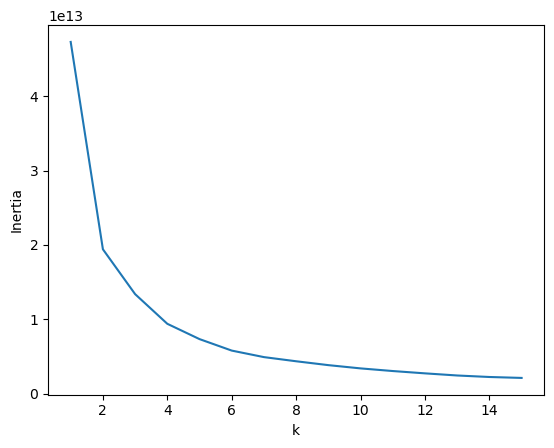

In [93]:
inertiaArr = np.array(inertiaLst).transpose()
plt.plot(inertiaArr[0], inertiaArr[1])
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [94]:
#Based off this, we can assume the elbow point for the dataset is when the kval=4 or 5